# DATA SCIENCE PROJECT GROUP 9

## Team Members:

* Prajwal Verma
* Mrinalini Suresh Jadhav 
* Harsh Shah


# Hypothesis

### Introducing carbon taxes in countries with high GDP dependence on carbon emissions will lead to a reduction in CO2 emissions while maintaining sustainable economic growth.

## Understanding Carbon Taxes and GDP

### What Are Carbon Taxes?
Carbon taxes are a form of environmental taxation where governments impose a fee on the carbon content of fossil fuels. The primary goal is to reduce greenhouse gas emissions by making the use of carbon-intensive fuels more expensive. By increasing the cost of carbon-emitting activities, these taxes encourage individuals and businesses to adopt cleaner and more sustainable practices.

### How Carbon Taxes Are Related to GDP
1. **Economic Impact**:
   - Carbon taxes influence GDP by potentially increasing the cost of production in industries that heavily rely on fossil fuels. This can lead to a shift toward cleaner technologies and innovation.
   - While there may be short-term economic adjustments, many studies show that well-designed carbon taxes can drive long-term economic benefits by promoting energy efficiency and reducing environmental damage.

2. **Revenue Recycling**:
   - Governments can use the revenue generated from carbon taxes to support public initiatives, such as renewable energy projects, infrastructure development, or lowering other taxes (e.g., income taxes). This can mitigate potential negative impacts on GDP.

3. **Environmental Benefits**:
   - Reduced emissions contribute to a healthier environment, which can have positive economic effects by reducing healthcare costs and preserving natural resources that are vital to economic activities.

4. **Empirical Evidence**:
   - Countries like Sweden and Denmark, which have implemented carbon taxes, have shown that it is possible to reduce emissions while maintaining robust economic growth.
   - The data from this project demonstrates a potential relationship where countries with carbon taxes often see reduced CO2 emissions without significantly compromising GDP growth.

In summary, carbon taxes serve as an effective tool to transition economies toward sustainable growth while addressing the pressing issue of climate change.

## Data Loading 

The project begins by loading three main datasets:
1. `co2-emissions.csv`: Contains CO2 emission data for various countries.
2. `emissions-weighted-carbon-price.csv`: Tracks carbon tax prices weighted by emissions.
3. `gdp-per-capita.csv`: Contains GDP per capita data for various countries.

In [6]:
import pandas as pd

carbon_emmision_data = pd.read_csv('./data/co2-emissions.csv')
emissions_weight_data = pd.read_csv('./data/emissions-weighted-carbon-price.csv')
gdp_data = pd.read_csv('./data/gdp-per-capita.csv')

In [7]:
carbon_emmision_data.head()

,Entity,Code,Year,CO2_Emissions
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123


In [8]:
emissions_weight_data.head()

,Entity,Code,Year,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO₂ emissions"
0,Afghanistan,AFG,1989,0.0
1,Afghanistan,AFG,1990,0.0
2,Afghanistan,AFG,1991,0.0
3,Afghanistan,AFG,1992,0.0
4,Afghanistan,AFG,1993,0.0


In [9]:
gdp_data.head()

,Entity,Code,Year,GDP per capita
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605
3,Afghanistan,AFG,2005,1352.3207
4,Afghanistan,AFG,2006,1366.9932


## Data Preprocessing 


To clean and prepare the data, the following steps were performed:
- Restrict the data to the years 1990-2021.
- Handle missing values by replacing them with placeholders where appropriate.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

current_path = {
    "co2_emissions": "./data/co2-emissions.csv",
    "emissions_weighted_carbon_price": "./data/emissions-weighted-carbon-price.csv",
    "gdp_per_capita": "./data/gdp-per-capita.csv",
}

taxColumn = "Average price on emissions covered by a carbon tax, weighted by the share of the country's CO₂ emissions"

current_datasets = {name: pd.read_csv(path) for name, path in current_path.items()}
# Preprocessing steps: We need data from 1990 to 2021
for fileName, fileData in current_datasets.items():
    if 'Year' in fileData.columns:
        filtered_data = fileData[(fileData['Year'] >= 1990) & (fileData['Year'] <= 2021)]
        current_datasets[fileName] = filtered_data  # Update the dataset

    # Handle missing values
    if "Code" in fileData.columns:
        fileData['Code'] = fileData['Code'].fillna("Unknown")
   
# Save processed datasets to CSV
for fileName, fileData in current_datasets.items():
    fileData.to_csv(f"./processed_{fileName}.csv", index=False)


## Data Filtering

The project filters datasets to focus on specific countries that are either heavily reliant on carbon emissions or are leaders in implementing carbon taxes. This allows a more targeted analysis of carbon tax impacts.


In [13]:
# Filteration of the dataset from the processed data:
def getSelectedData( selected_countries ):
    # Filter datasets for selected countries
    selected_countries_dataset = {}
    for fileName, dataFrame in current_datasets.items():
        selected_countries_dataset[fileName] = dataFrame[dataFrame["Entity"].isin(selected_countries)]
        
    
    # Save the filtered datasets to new CSV files
    for name, dataFrame in selected_countries_dataset.items():
        dataFrame.to_csv(f"./filtered_{name}.csv", index=False)
    return selected_countries_dataset


## Data Merging 
The filtered datasets are merged to analyze the relationship between carbon emissions, carbon taxes, and GDP per capita.


In [15]:
# Selected countries: which are not using the carban tax but 
# their GDP is hightly dependent on the carbon emmision as seen by the visualization 
current_countries = [
    'Bolivia', 
    'Myanmar', 
    'Senegal', 
    'Iran',  
    'Argentina',
    'India',
]

current_data = getSelectedData(current_countries)

# Merge DataFrames sequentially
merged_data = pd.merge(
    current_data['co2_emissions'], 
    current_data['emissions_weighted_carbon_price'], 
    on=['Entity', 'Year']
)

merged_data = pd.merge(
    merged_data,
    current_data['gdp_per_capita'],
    on=['Entity', 'Year']
)


merged_data.head()

,Entity,Code_x,Year,CO2_Emissions,Code_y,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO₂ emissions",Code,GDP per capita
0,Argentina,ARG,1990,3.423770,ARG,0.0,ARG,14136.525
1,Argentina,ARG,1991,3.543601,ARG,0.0,ARG,15209.487
2,Argentina,ARG,1992,3.607063,ARG,0.0,ARG,16190.511
3,Argentina,ARG,1993,3.455100,ARG,0.0,ARG,17282.965
4,Argentina,ARG,1994,3.422637,ARG,0.0,ARG,18046.893


## Data Visualization

### 1. Line Chart for CO2 Emissions Over Time

This visualization shows the trend of CO2 emissions for the selected countries over time, providing insights into emission growth or decline.


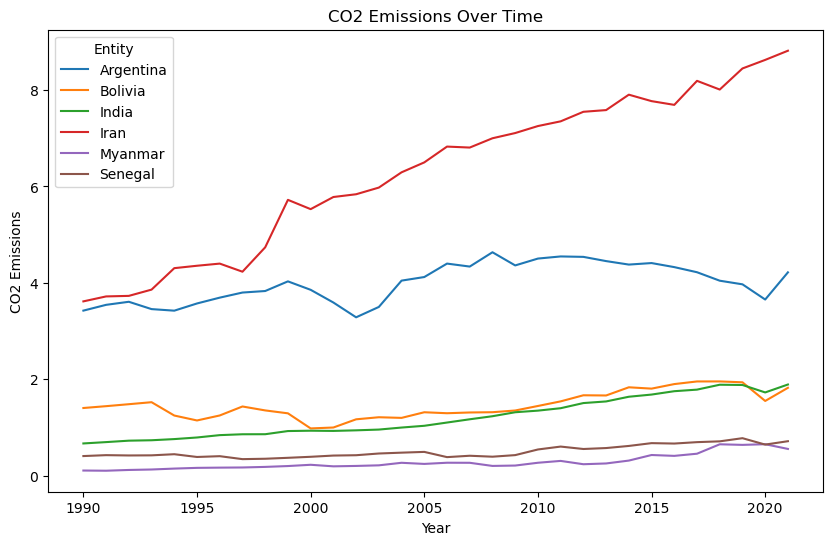

In [17]:
# Load one of the processed datasets as an example
co2_emissions = pd.read_csv("./filtered_co2_emissions.csv")

# 1. Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=co2_emissions, x='Year', y='CO2_Emissions', hue='Entity')
plt.title('CO2 Emissions Over Time')
plt.ylabel('CO2 Emissions')
plt.show()

### 2. GDP Growth Over Time

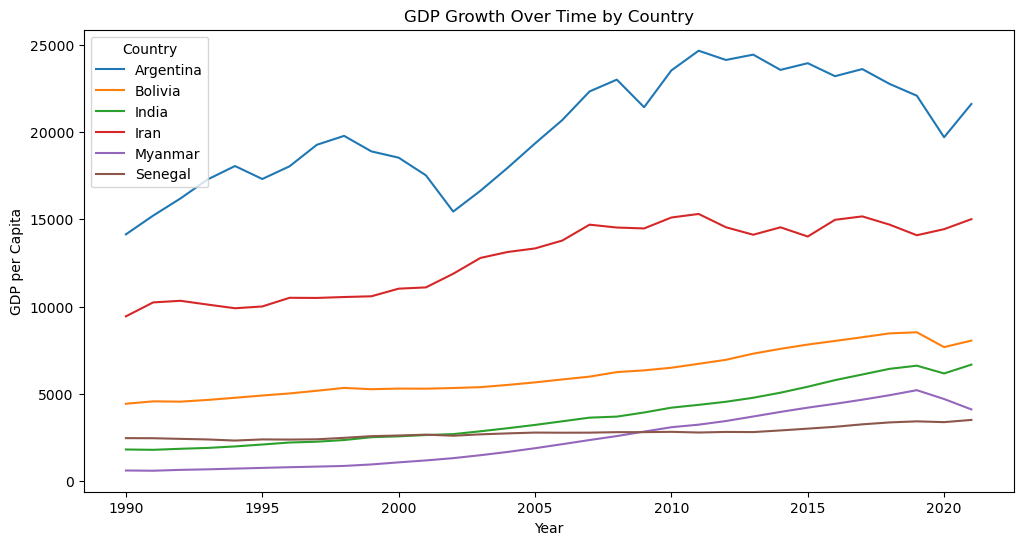

In [19]:
# 2. GDP Growth Over Time

gdp_data = pd.read_csv("./filtered_gdp_per_capita.csv")
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_data, x="Year", y="GDP per capita", hue="Entity")
plt.title("GDP Growth Over Time by Country")
plt.ylabel("GDP per Capita")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()

### Visualization of CO2 Emissions, GDP Per Capita, and Carbon Tax

This function generates a grid of graphs, with each graph showing the trends of CO2 emissions, GDP per capita, and carbon tax for a selected country. It uses subplots to visualize the data for multiple countries efficiently.


In [21]:
import matplotlib.pyplot as plt
import math

# Assuming `selected_countries` is a list of country names
def getTheGraph( selected_countries, title ):
    num_countries = len(selected_countries)
    rows = math.ceil(num_countries / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(24, 6 * rows))
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for i, country in enumerate(selected_countries):
        country_data = merged_data[merged_data["Entity"] == country]
        ax1 = axes[i]
    
        # CO2 Emissions
        ax1.set_xlabel("Year")
        ax1.set_ylabel("CO2 Emissions", color="tab:blue")
        ax1.plot(country_data["Year"], country_data["CO2_Emissions"], label="CO2 Emissions", color="tab:blue")
        ax1.tick_params(axis="y", labelcolor="tab:blue")
    
        # Twin axis for GDP per Capita
        ax2 = ax1.twinx()
        ax2.set_ylabel("GDP per Capita", color="tab:green")
        ax2.plot(country_data["Year"], country_data["GDP per capita"], label="GDP per Capita", color="tab:green")
        ax2.tick_params(axis="y", labelcolor="tab:green")

        # Twin axis for GDP per Capita
        ax3 = ax1.twinx()
        ax3.set_ylabel("Carbon Tax", color="tab:red")
        ax3.plot(country_data["Year"], country_data[taxColumn], label="Carbon Tax", color="tab:red")
        ax3.tick_params(axis="y", labelcolor="tab:green")
        
        # Title
        ax1.set_title(f"{country}")
    
    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    fig.suptitle( title, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

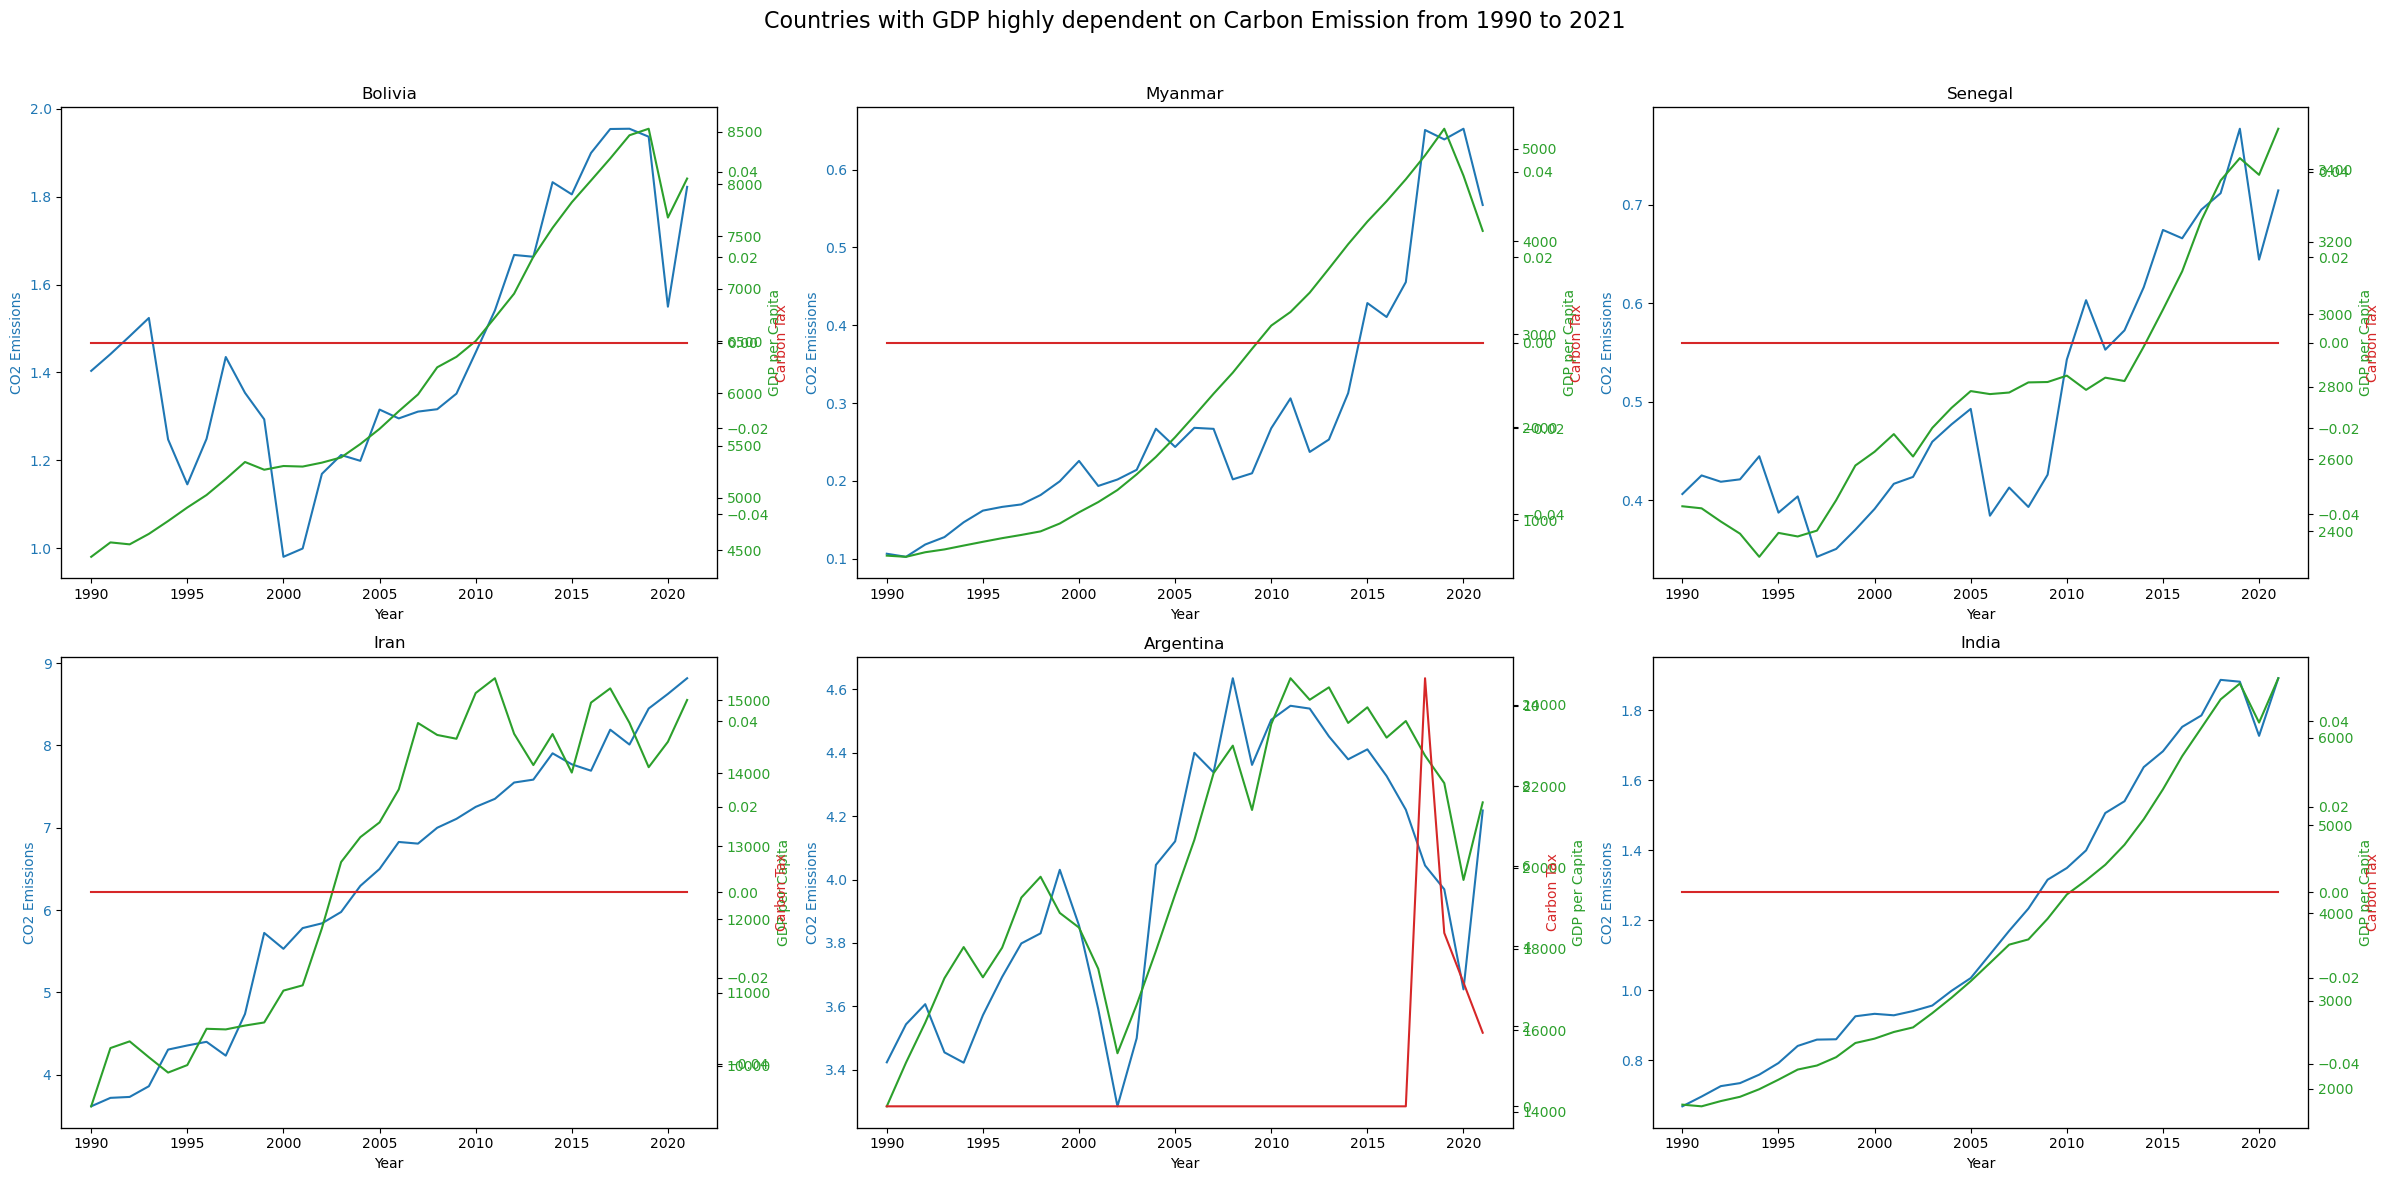

In [22]:
# Observarions: 
getTheGraph( current_countries, "Countries with GDP highly dependent on Carbon Emission from 1990 to 2021" )

### Analyzing Countries That Overcame Carbon Dependency

This section highlights how certain countries transitioned from being dependent on carbon to adopting sustainable practices. The analysis involves selecting specific countries, merging relevant datasets, and visualizing the trends.


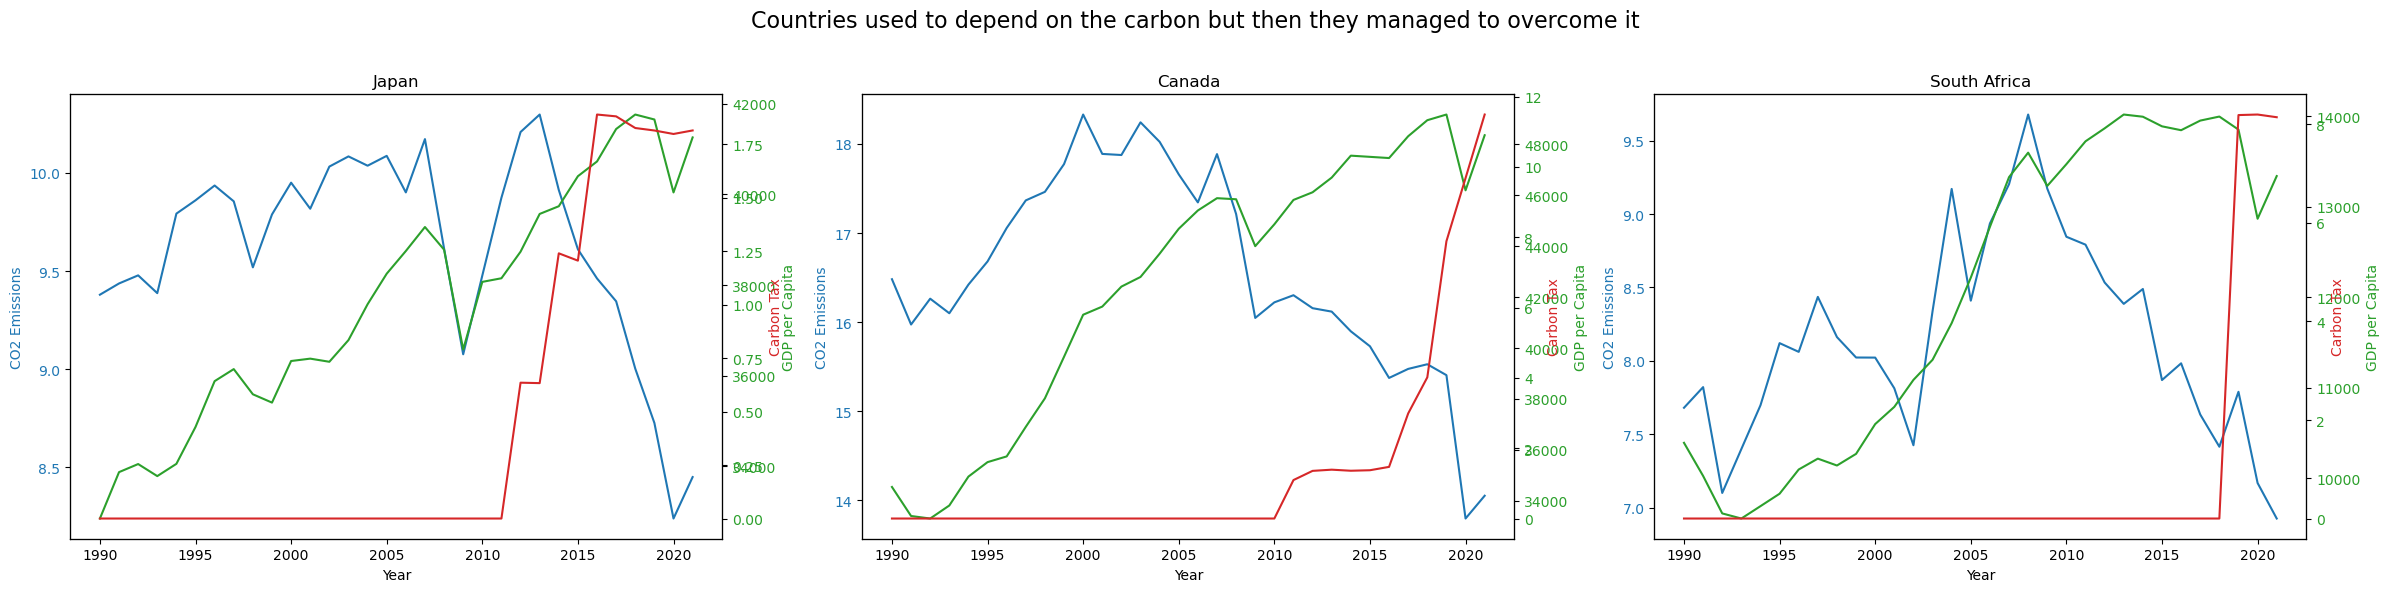

,Entity,Code_x,Year,CO2_Emissions,Code_y,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO₂ emissions",Code,GDP per capita
0,Canada,CAN,1990,16.481619,CAN,0.0,CAN,34544.625
1,Canada,CAN,1991,15.973068,CAN,0.0,CAN,33404.550
2,Canada,CAN,1992,16.263006,CAN,0.0,CAN,33305.434
3,Canada,CAN,1993,16.099540,CAN,0.0,CAN,33816.920
4,Canada,CAN,1994,16.421047,CAN,0.0,CAN,34951.754


In [24]:
current_countries = [
    'Japan', 
    'Canada',   
    'South Africa',
]

current_data = getSelectedData(current_countries)

# Merge DataFrames sequentially
merged_data = pd.merge(
    current_data['co2_emissions'], 
    current_data['emissions_weighted_carbon_price'], 
    on=['Entity', 'Year']
)

merged_data = pd.merge(
    merged_data,
    current_data['gdp_per_capita'],
    on=['Entity', 'Year']
)

getTheGraph( current_countries, "Countries used to depend on the carbon but then they managed to overcome it" )

merged_data.head()

### Visualization: Trends in Carbon Dependency

The following function generates a graph for each selected country, showing the trends in CO2 emissions, GDP per capita, and carbon tax.

### This function produces a subplot for each country, displaying:

* CO2 Emissions: To observe the reduction in emissions over time.
* GDP per Capita: To correlate economic growth with emissions.
* Carbon Tax: To evaluate the impact of carbon tax implementation.


In [26]:
# Again Selected countries: which are not using the carban tax but 
# their GDP is hightly dependent on the carbon emmision as seen by the visualization 
current_countries = [
    'Bolivia', 
    'Myanmar', 
    'Senegal', 
    'Iran',  
    'Argentina',
    'India',
]

current_data = getSelectedData(current_countries)

# Merge DataFrames sequentially
merged_data = pd.merge(
    current_data['co2_emissions'], 
    current_data['emissions_weighted_carbon_price'], 
    on=['Entity', 'Year']
)

merged_data = pd.merge(
    merged_data,
    current_data['gdp_per_capita'],
    on=['Entity', 'Year']
)


merged_data.head()

,Entity,Code_x,Year,CO2_Emissions,Code_y,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO₂ emissions",Code,GDP per capita
0,Argentina,ARG,1990,3.423770,ARG,0.0,ARG,14136.525
1,Argentina,ARG,1991,3.543601,ARG,0.0,ARG,15209.487
2,Argentina,ARG,1992,3.607063,ARG,0.0,ARG,16190.511
3,Argentina,ARG,1993,3.455100,ARG,0.0,ARG,17282.965
4,Argentina,ARG,1994,3.422637,ARG,0.0,ARG,18046.893



### Model Training: Carbon Tax and Emissions Analysis

This section focuses on training a linear regression model to analyze the relationship between GDP per capita and CO2 emissions. The goal is to predict emissions and calculate a carbon tax based on emissions per GDP.

#### Function: `getTheTaxData`

This function performs the following steps for a given country:
1. Filters data for the selected country.
2. Performs linear regression to model the relationship between GDP per capita and CO2 emissions.
3. Calculates predicted emissions and derives a carbon tax based on emissions per GDP.

In [28]:
# Model training:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def getTheTaxData( currentCountry):
    # Filter data for the selected countries
    data = merged_data[merged_data['Entity'].isin([currentCountry])]

    # Use scipy.stats.linregress to perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data['GDP per capita'], data['CO2_Emissions'])

    # Display regression parameters
    print("Regression Results for COUNTRY: ", currentCountry)
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")

    # Add predicted emissions based on the model
    data['Predicted_Emissions'] = intercept + slope * data['GDP per capita']

    # Calculate Emissions per GDP
    data['CO2_Emissions'] = data['CO2_Emissions'] / data['GDP per capita']

    # Calculate Carbon Tax based on Emissions per GDP
    # Using a proportionality constant to set the tax rate
    proportionality_constant = 100000  # Adjust this based on policy goals
    data['Carbon_Tax'] = proportionality_constant * data['CO2_Emissions']

    return data


### Visualization: Carbon Tax Distribution Across Selected Countries (1990-2021)

This visualization presents the distribution of carbon taxes across multiple countries over the years 1990-2021. Each subplot represents one country, showing how carbon taxes have evolved annually during this period.

#### Key Features:
- **Histogram Visualization**:
  - Displays the distribution of carbon taxes for each year.
  - Weights the histogram bars by the calculated carbon tax values.
  
- **Countries Analyzed**:
  - Includes selected countries such as Japan, Canada, and South Africa.
  
- **Subplot Layout**:
  - A grid layout is dynamically created based on the number of countries, with up to 3 columns per row for efficient use of space.

#### Insights:
- **Yearly Trends**:
  - The histograms highlight the variation in carbon taxes over time for each country.
  
- **Comparative Analysis**:
  - Allows easy comparison of carbon tax distributions among countries.

- **Policy Impact**:
  - Identifies specific years where significant changes in carbon tax policies may have occurred, reflected in sharp increases or decreases.

#### Visualization Details:
- **X-Axis**:
  - Represents the years from 1990 to 2021.
  
- **Y-Axis**:
  - Shows the carbon tax values (in $/ton) weighted by the tax data.

- **Grid**:
  - Provides a clear and structured view for each country.

- **Color Scheme**:
  - Uses green bars for histograms to signify carbon tax data, with black edges for clarity.

#### Use Case:
This visualization is useful for:
- Understanding the temporal distribution of carbon taxes within individual countries.
- Analyzing the effectiveness of carbon tax policies over time.
- Comparing trends across multiple countries to derive insights about global or regional carbon tax strategies.

#### Example Output:
Each subplot is titled with the respective country’s name and provides a clear visualization of its carbon tax distribution over the years. The layout ensures readability and effective comparison.


Regression Results for COUNTRY:  Bolivia
Slope: 0.00017385685302831257
Intercept: 0.3889953542702351
R-squared: 0.6671534845184579
P-value: 1.187865969733772e-08
Standard Error: 2.242024297693787e-05
Regression Results for COUNTRY:  Myanmar
Slope: 8.929244833635377e-05
Intercept: 0.0677331382722055
R-squared: 0.7757241967357241
P-value: 2.9702918009877386e-11
Standard Error: 8.765801765138738e-06
Regression Results for COUNTRY:  Senegal
Slope: 0.0003362548200026288
Intercept: -0.43325245826598235
R-squared: 0.7729516126237512
P-value: 3.57730852160752e-11
Standard Error: 3.3272922470569226e-05
Regression Results for COUNTRY:  Iran
Slope: 0.0007468301945330412
Intercept: -3.2444372915366966
R-squared: 0.8740617109744695
P-value: 4.891267006299217e-15
Standard Error: 5.1756999044212684e-05
Regression Results for COUNTRY:  Argentina
Slope: 0.00011887109688775279
Intercept: 1.600435503670799
R-squared: 0.8093573170839625
P-value: 2.5459458801260925e-12
Standard Error: 1.0533084415198006e-0

/var/folders/7z/h92rmmxx3r93sd2lnpd010340000gn/T/ipykernel_650/2847775709.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Emissions'] = intercept + slope * data['GDP per capita']
/var/folders/7z/h92rmmxx3r93sd2lnpd010340000gn/T/ipykernel_650/2847775709.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2_Emissions'] = data['CO2_Emissions'] / data['GDP per capita']
/var/folders/7z/h92rmmxx3r93sd2lnpd010340000gn/T/ipykernel_650/2847775709.py:31: SettingWithCopyWarning: 
A value 

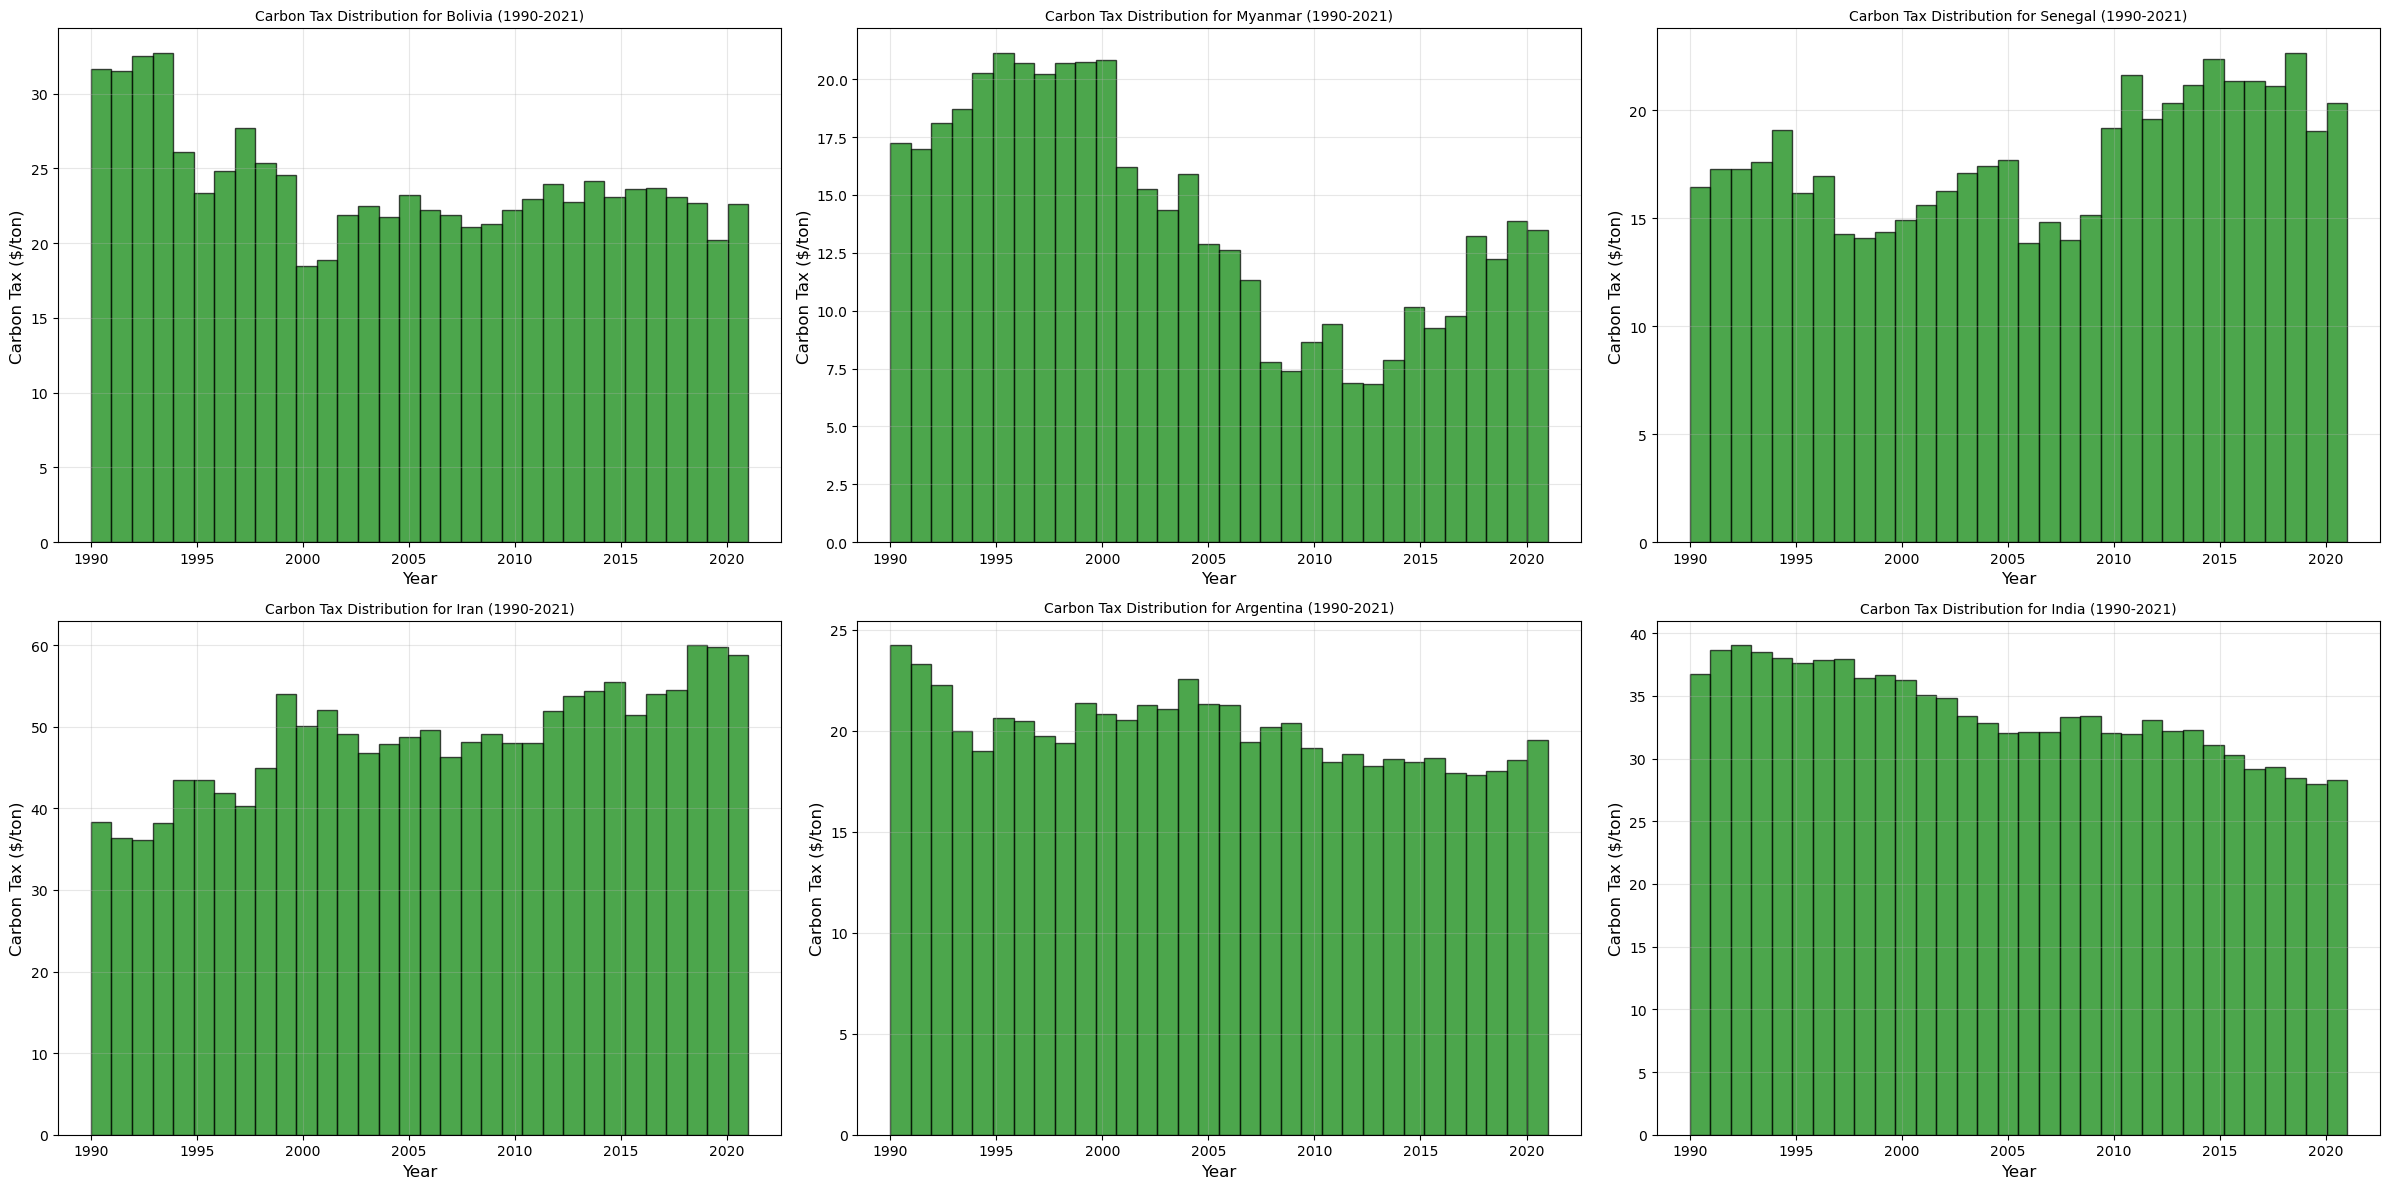

In [30]:
import matplotlib.pyplot as plt
import math

# Create a figure with multiple rows and 3 columns for subplots
num_countries = len(current_countries)
rows = math.ceil(num_countries / 3)
fig, axes = plt.subplots(rows, 3, figsize=(24, 6 * rows))

# Flatten the axes array to handle it uniformly
axes = axes.flatten()

# Iterate over the countries and axes
for index, country in enumerate(current_countries):
    # Get data for the current country
    data = getTheTaxData(country)

    # Access the correct subplot
    ax = axes[index]

    # Create histogram for the current country
    ax.hist(data['Year'], weights=data['Carbon_Tax'], bins=len(data['Year'].unique()), alpha=0.7, color='green', edgecolor='black')

    # Add titles and labels for each subplot
    ax.set_title(f'Carbon Tax Distribution for {country} (1990-2021)', fontsize=10)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Carbon Tax ($/ton)', fontsize=12)

    # Add grid
    ax.grid(alpha=0.3)

# Remove unused subplots if any
for i in range(len(current_countries), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()



    

---- Argentina
Regression Results for COUNTRY:  Argentina
Slope: 0.00011887109688775279
Intercept: 1.600435503670799
R-squared: 0.8093573170839625
P-value: 2.5459458801260925e-12
Standard Error: 1.0533084415198006e-05
---- Australia
Regression Results for COUNTRY:  Australia
Slope: 1.0663356495581725e-05
Intercept: 16.995736613882123
R-squared: 0.003540947488493961
P-value: 0.7463088557306528
Standard Error: 3.265903037434165e-05
---- Canada
Regression Results for COUNTRY:  Canada
Slope: -6.71295474517663e-05
Intercept: 19.42092532743595
R-squared: 0.09479957769834442
P-value: 0.08646412527782456
Standard Error: 3.787235091608109e-05
---- Chile
Regression Results for COUNTRY:  Chile
Slope: 0.0001382103539383193
Intercept: 1.2123064853635745
R-squared: 0.8610286466533542
P-value: 2.157576077357958e-14
Standard Error: 1.013756833731063e-05
---- Colombia
Regression Results for COUNTRY:  Colombia
Slope: 5.1151368568328694e-05
Intercept: 1.113925524557442
R-squared: 0.2958911934487101
P-val

/var/folders/7z/h92rmmxx3r93sd2lnpd010340000gn/T/ipykernel_650/2847775709.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Emissions'] = intercept + slope * data['GDP per capita']
/var/folders/7z/h92rmmxx3r93sd2lnpd010340000gn/T/ipykernel_650/2847775709.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2_Emissions'] = data['CO2_Emissions'] / data['GDP per capita']
/var/folders/7z/h92rmmxx3r93sd2lnpd010340000gn/T/ipykernel_650/2847775709.py:31: SettingWithCopyWarning: 
A value 

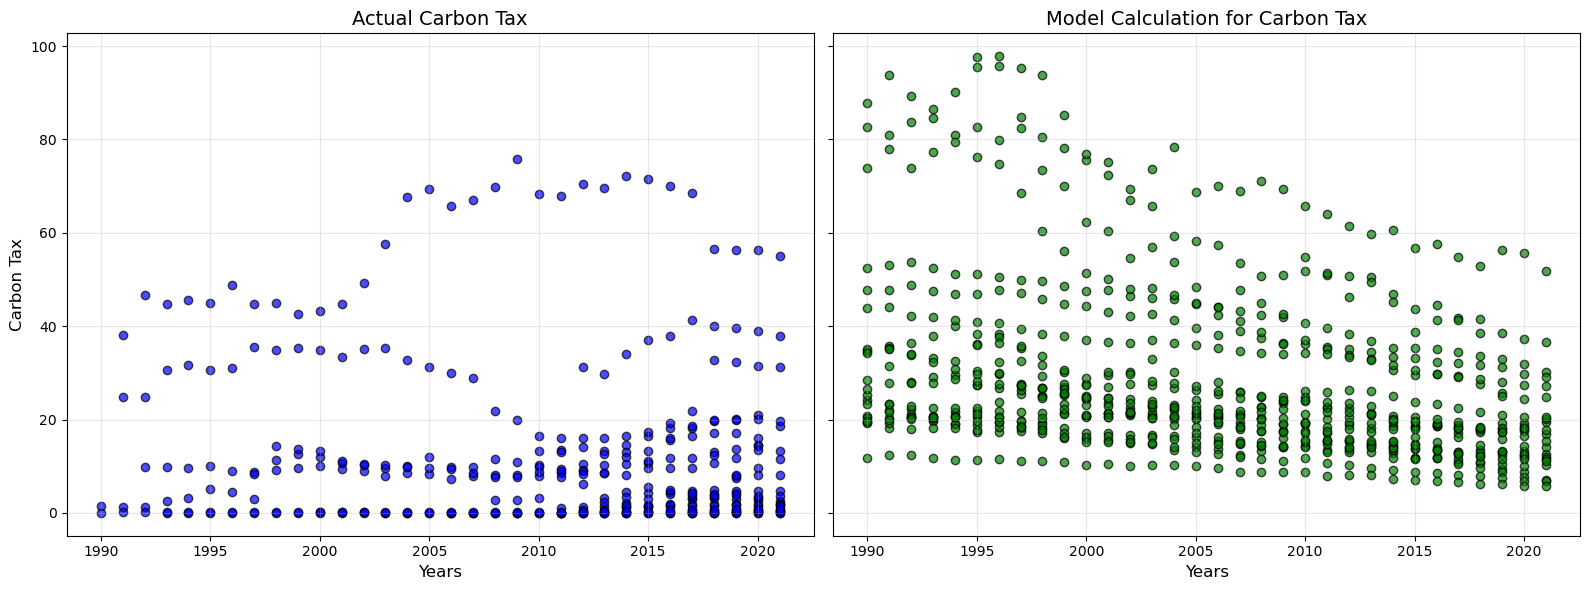

In [31]:
# But we need to test the results which we got,
# so we will compare the result with the countries which used the carbon tax and still achieving better GDP

# Segregate the list of data with some tax is there atleast\
def getNonNullTaxData():
    selected_countries_dataset = {}
    for fileName, dataFrame in current_datasets.items():
        if taxColumn in dataFrame.columns:
            selected_countries_dataset[fileName] = dataFrame[dataFrame[taxColumn] != 0.0]
        else:
            print(f"Warning: {taxColumn} not found in {fileName}")
    return selected_countries_dataset

tax_data_dict = getNonNullTaxData()
tax_data = pd.concat(tax_data_dict.values(), ignore_index=True)

merged_data = tax_data
unique_entities = tax_data['Entity'].unique()
current_data = getSelectedData(unique_entities)

# Merge DataFrames sequentially
merged_data = pd.merge(
    current_data['co2_emissions'], 
    current_data['emissions_weighted_carbon_price'], 
    on=['Entity', 'Year']
)

merged_data = pd.merge(
    merged_data,
    current_data['gdp_per_capita'],
    on=['Entity', 'Year']
)


import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Blue points (overall tax data)
axes[0].scatter(tax_data['Year'], tax_data[taxColumn], color='blue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Years', fontsize=12)
axes[0].set_ylabel('Carbon Tax', fontsize=12)
axes[0].set_title('Actual Carbon Tax', fontsize=14)
axes[0].grid(alpha=0.3)

# Plot 2: Green points (entity-specific tax data)
for entry in unique_entities:
    print('----', entry)
    data = getTheTaxData(entry)
    axes[1].scatter(data['Year'], data['Carbon_Tax'], color='green', edgecolor='black', alpha=0.7)

axes[1].set_xlabel('Years', fontsize=12)
axes[1].set_title('Model Calculation for Carbon Tax', fontsize=14)
axes[1].grid(alpha=0.3)
# axes[1].legend()  # Add a legend for the entities

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

    


* Let us take the case of INDIA, where the country's GDP is high replicates the carbon emission pattern
* Now we need to simulate the case if INDIA would have implemented the carbon tax in 2010, what would be the current scenario
* The tax calcualtion will be done via our model and the simulation will predict the future and this will carry on till 2021
* Thus, we can see the difference in the outcomes. 

In [33]:
# PYMC

# let us take the case of INDIA, where the country's GDP is high replicates the carbon emission pattern
# now we need to simulate the case if INDIA would have implemented the carbon tax in 2010, what would be the current scenario
# the tax calcualtion will be done via our model and the simulation will predict the future and this will carry on till 2021
# Thus, we can see the difference in the outcomes. 

current_data = getSelectedData(['India'])

# Merge DataFrames sequentially
data = pd.merge(
    current_data['co2_emissions'], 
    current_data['emissions_weighted_carbon_price'], 
    on=['Entity', 'Year']
)

data = pd.merge(
    data,
    current_data['gdp_per_capita'],
    on=['Entity', 'Year']
)


data.head()


,Entity,Code_x,Year,CO2_Emissions,Code_y,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO₂ emissions",Code,GDP per capita
0,India,IND,1990,0.668225,IND,0.0,IND,1819.0216
1,India,IND,1991,0.696171,IND,0.0,IND,1800.0109
2,India,IND,1992,0.725889,IND,0.0,IND,1859.7148
3,India,IND,1993,0.734504,IND,0.0,IND,1908.5782
4,India,IND,1994,0.758703,IND,0.0,IND,1994.9440


## Regression Analysis
Regression analysis determines the relationship between GDP and CO2 emissions, allowing the estimation of carbon taxes based on economic activity.

### Function to Calculate and Visualize Results

# Bayesian Modeling with PyMC
Using PyMC, a Bayesian model is constructed to estimate the influence of GDP per capita and carbon tax on adjusted CO2 emissions. Priors are defined for regression coefficients, and posterior distributions are sampled to simulate the impact of carbon tax implementation.



In [36]:
# Function to calculate carbon tax and adjust emissions
def getTheTaxData(currentCountry):
    # Use scipy.stats.linregress to perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data['GDP per capita'], data['CO2_Emissions'])

    # Display regression parameters
    print("Regression Results for COUNTRY: ", currentCountry)
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")

    # Add predicted emissions based on the model
    data['Predicted_Emissions'] = intercept + slope * data['GDP per capita']

    # Calculate Emissions per GDP
    data['Emissions_per_GDP'] = data['CO2_Emissions'] / data['GDP per capita']

    # Calculate Carbon Tax based on Emissions per GDP
    proportionality_constant = 10000  # Adjust this based on policy goals
    data['Carbon_Tax'] = proportionality_constant * data['Emissions_per_GDP']

    data['Adjusted_Emissions'] = data['CO2_Emissions'].copy()

    # Adjust emissions iteratively for years after 2010
    for i in range(len(data)):
        if data.iloc[i]['Year'] > 2010:
            # Use the previous year's Adjusted_Emissions to calculate the current year's emissions
            data.at[i, 'Adjusted_Emissions'] = (
                data.iloc[i - 1]['Adjusted_Emissions'] * (1 - 0.01 * data.iloc[i]['Carbon_Tax'])
            )
        else:
            # Keep emissions unchanged before 2010
            data.at[i, 'Adjusted_Emissions'] = data.iloc[i]['CO2_Emissions']
            
    return data

In [37]:
# Apply tax calculations to India's data
tax_data = getTheTaxData('India')
print( tax_data )

Regression Results for COUNTRY:  India
Slope: 0.0002526963754713471
Intercept: 0.2650336987650346
R-squared: 0.9888410516159629
P-value: 7.52304639946524e-31
Standard Error: 4.901023397180466e-06
   Entity Code_x  Year  CO2_Emissions Code_y  \
0   India    IND  1990       0.668225    IND   
1   India    IND  1991       0.696171    IND   
2   India    IND  1992       0.725889    IND   
3   India    IND  1993       0.734504    IND   
4   India    IND  1994       0.758703    IND   
5   India    IND  1995       0.791899    IND   
6   India    IND  1996       0.840705    IND   
7   India    IND  1997       0.858755    IND   
8   India    IND  1998       0.859726    IND   
9   India    IND  1999       0.925389    IND   
10  India    IND  2000       0.932435    IND   
11  India    IND  2001       0.928220    IND   
12  India    IND  2002       0.940360    IND   
13  India    IND  2003       0.956066    IND   
14  India    IND  2004       0.998095    IND   
15  India    IND  2005       1.03456

In [38]:
import pymc as pm

with pm.Model() as model:
    # Priors for regression coefficients
    beta_gdp = pm.Normal('beta_gdp', mu=0, sigma=10)
    beta_tax = pm.Normal('beta_tax', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Carbon tax indicator (0 before 2010, 1 after)
    tax_indicator = (tax_data['Year'] >= 2010).astype(int)

    # Expected emissions with tax adjustment
    mu = intercept + beta_gdp * tax_data['GDP per capita'] + beta_tax * tax_data['Carbon_Tax'] * tax_indicator

    # Likelihood
    emissions_obs = pm.Normal('emissions_obs', mu=mu, sigma=sigma, observed=tax_data['Adjusted_Emissions'])

    # Posterior sampling
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_gdp, beta_tax, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


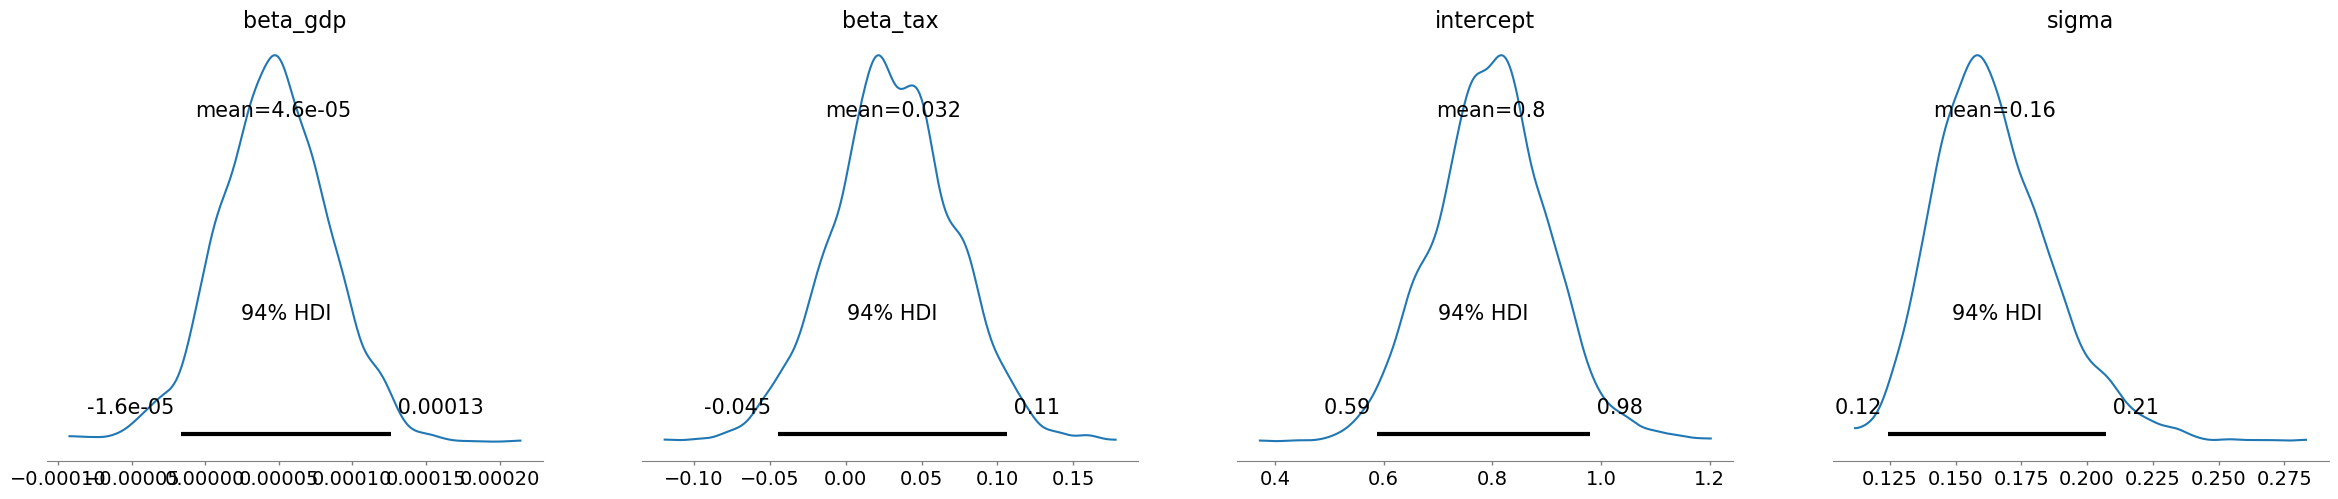

In [39]:
# Plot posterior distributions for parameters
pm.plot_posterior(trace)
plt.show()

Sampling: [emissions_obs]


Output()

PREDICTION: 
KEY:  posterior_predictive
VALUE:  <xarray.Dataset>
Dimensions:              (chain: 4, draw: 1000, emissions_obs_dim_2: 32)
Coordinates:
  * chain                (chain) int64 0 1 2 3
  * draw                 (draw) int64 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * emissions_obs_dim_2  (emissions_obs_dim_2) int64 0 1 2 3 4 ... 28 29 30 31
Data variables:
    emissions_obs        (chain, draw, emissions_obs_dim_2) float64 0.604 ......
Attributes:
    created_at:                 2024-12-11T14:47:07.408720+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.17.0
KEY:  observed_data
VALUE:  <xarray.Dataset>
Dimensions:              (emissions_obs_dim_0: 32)
Coordinates:
  * emissions_obs_dim_0  (emissions_obs_dim_0) int64 0 1 2 3 4 ... 28 29 30 31
Data variables:
    emissions_obs        (emissions_obs_dim_0) float64 0.6682 0.6962 ... 0.9607
Attributes:
    created_at:                 2024-12-11T14:47:07.409907

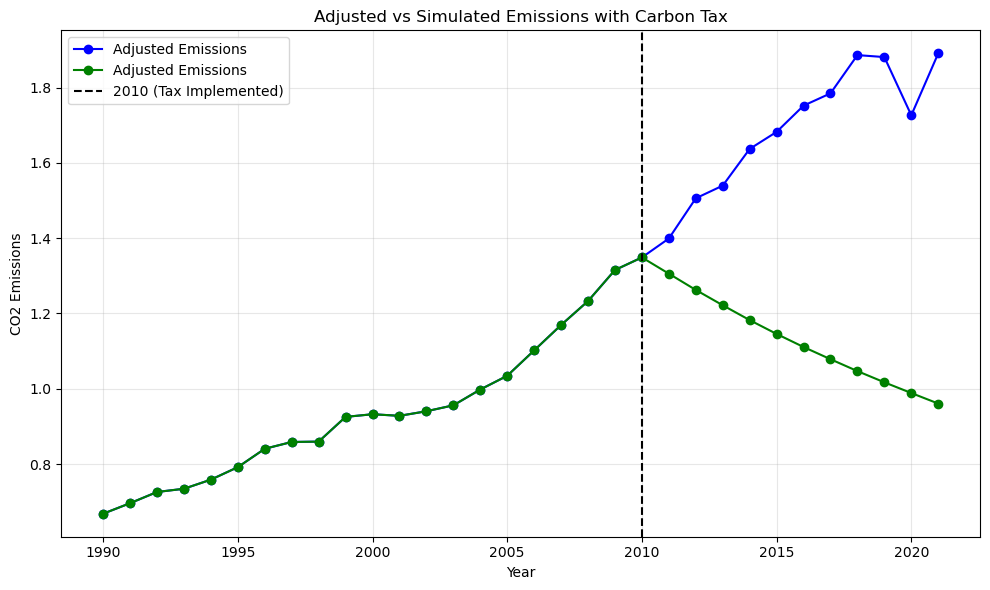

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Simulate emissions under different scenarios
with model:
    post_pred = pm.sample_posterior_predictive(trace)

# Extract predictions
pred_emissions = post_pred
print( "PREDICTION: ")
for key, value in pred_emissions.items():
    print( 'KEY: ', key)
    print( 'VALUE: ', value)
pred_emissions = post_pred['posterior_predictive']['emissions_obs']
print( pred_emissions)

# Plot actual vs simulated emissions
plt.figure(figsize=(10, 6))
plt.plot(tax_data['Year'], tax_data['CO2_Emissions'], label='Adjusted Emissions', marker='o', color='blue')
plt.plot(tax_data['Year'], tax_data['Adjusted_Emissions'], label='Adjusted Emissions', marker='o', color='green')
plt.axvline(2010, color='black', linestyle='--', label='2010 (Tax Implemented)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Adjusted vs Simulated Emissions with Carbon Tax')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Posterior Analysis and Simulations
Posterior distributions are plotted to understand the variability in parameter estimates. Additionally, emissions are simulated under different scenarios using the sampled posterior predictive distributions.

# Key Insights

## Model Outputs:

Regression and Bayesian modeling provided insights into the effects of GDP and carbon taxes on emissions.
Simulated emissions under a carbon tax policy showed a measurable reduction compared to pre-tax levels.
Visualization:

The transition in emissions after 2010 reflects the effectiveness of tax implementation.
Posterior predictions help evaluate uncertainties in the modeled relationships.
This detailed modeling approach enhances the understanding of carbon tax impacts and provides a robust framework for policy evaluation.

## Observations

- Countries such as Bolivia, Myanmar, and Senegal have a high GDP dependence on carbon emissions.
- Further analysis demonstrates that nations with carbon taxes tend to achieve more sustainable growth by reducing emissions without significant economic drawbacks.

---


## Conclusion
The analysis highlights the critical role of carbon taxes in addressing environmental challenges without compromising economic growth. Countries heavily reliant on carbon emissions, like Bolivia and Myanmar, could benefit significantly by adopting carbon taxation strategies. Regression analysis supports the hypothesis that carbon taxes reduce emissions while promoting economic stability. Future research can extend this study to explore additional socio-economic impacts and refine models for optimized carbon tax policies.
